<a href="https://colab.research.google.com/github/suminyeom/project_Lovely-G.4_none/blob/main/House_Prices_1%EC%A3%BC%EC%B0%A8_%EC%88%98%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv")

In [40]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [43]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1460, 81)
(1459, 80)
(1459, 2)


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

LotFrontage 259개
Alley 1369개
MasVnrType 8개
MasVnrArea 8개
BsmtQual 37개
BsmtCond 37개
BsmtExposure 38개
BsmtFinType1 37개
BsmtFinType2 38개
Electrical 1개
FireplaceQu 690개
GarageType 81개
GarageYrBlt 81개
GarageFinish 81개
GarageQual 81개
GarageCond 81개
PoolQC 1453개
Fence 1179개
MiscFeature 1406개

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [46]:
#주택 가격 기술통계량
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


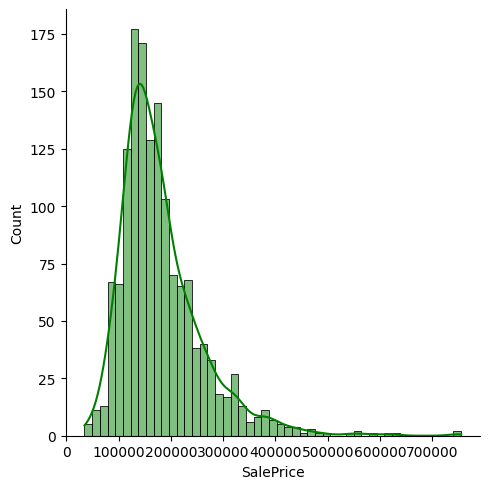

In [47]:
# 주택 가격 분포
sns.displot(data=train, x='SalePrice',color='g', kde=True)

In [48]:
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

n = (train.dtypes != 'object')
numerical_cols = list(n[n].index)

In [49]:
object_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [50]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [51]:
train_num = train.select_dtypes(include = ['float64', 'int64'])
train_obj = train.select_dtypes(include = 'object')

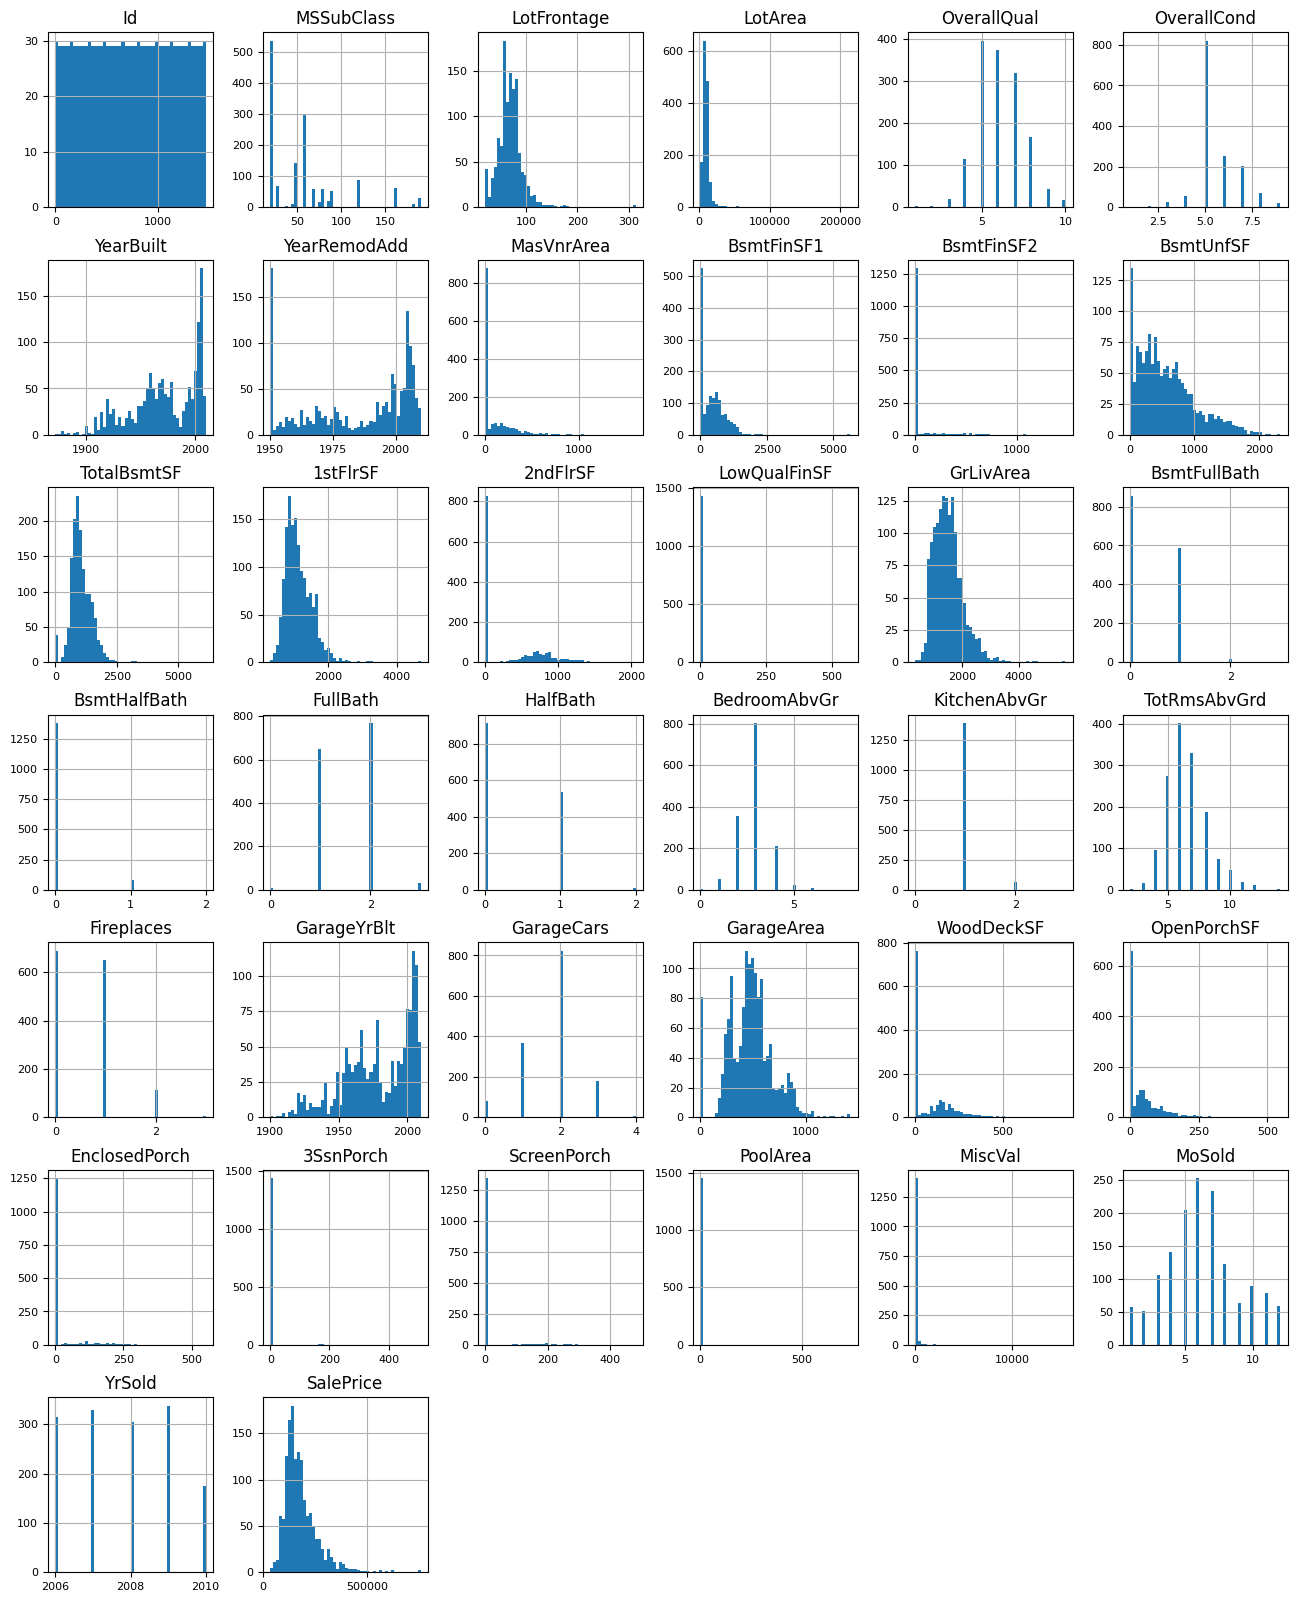

In [52]:
#수치형 변수들의 분포
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

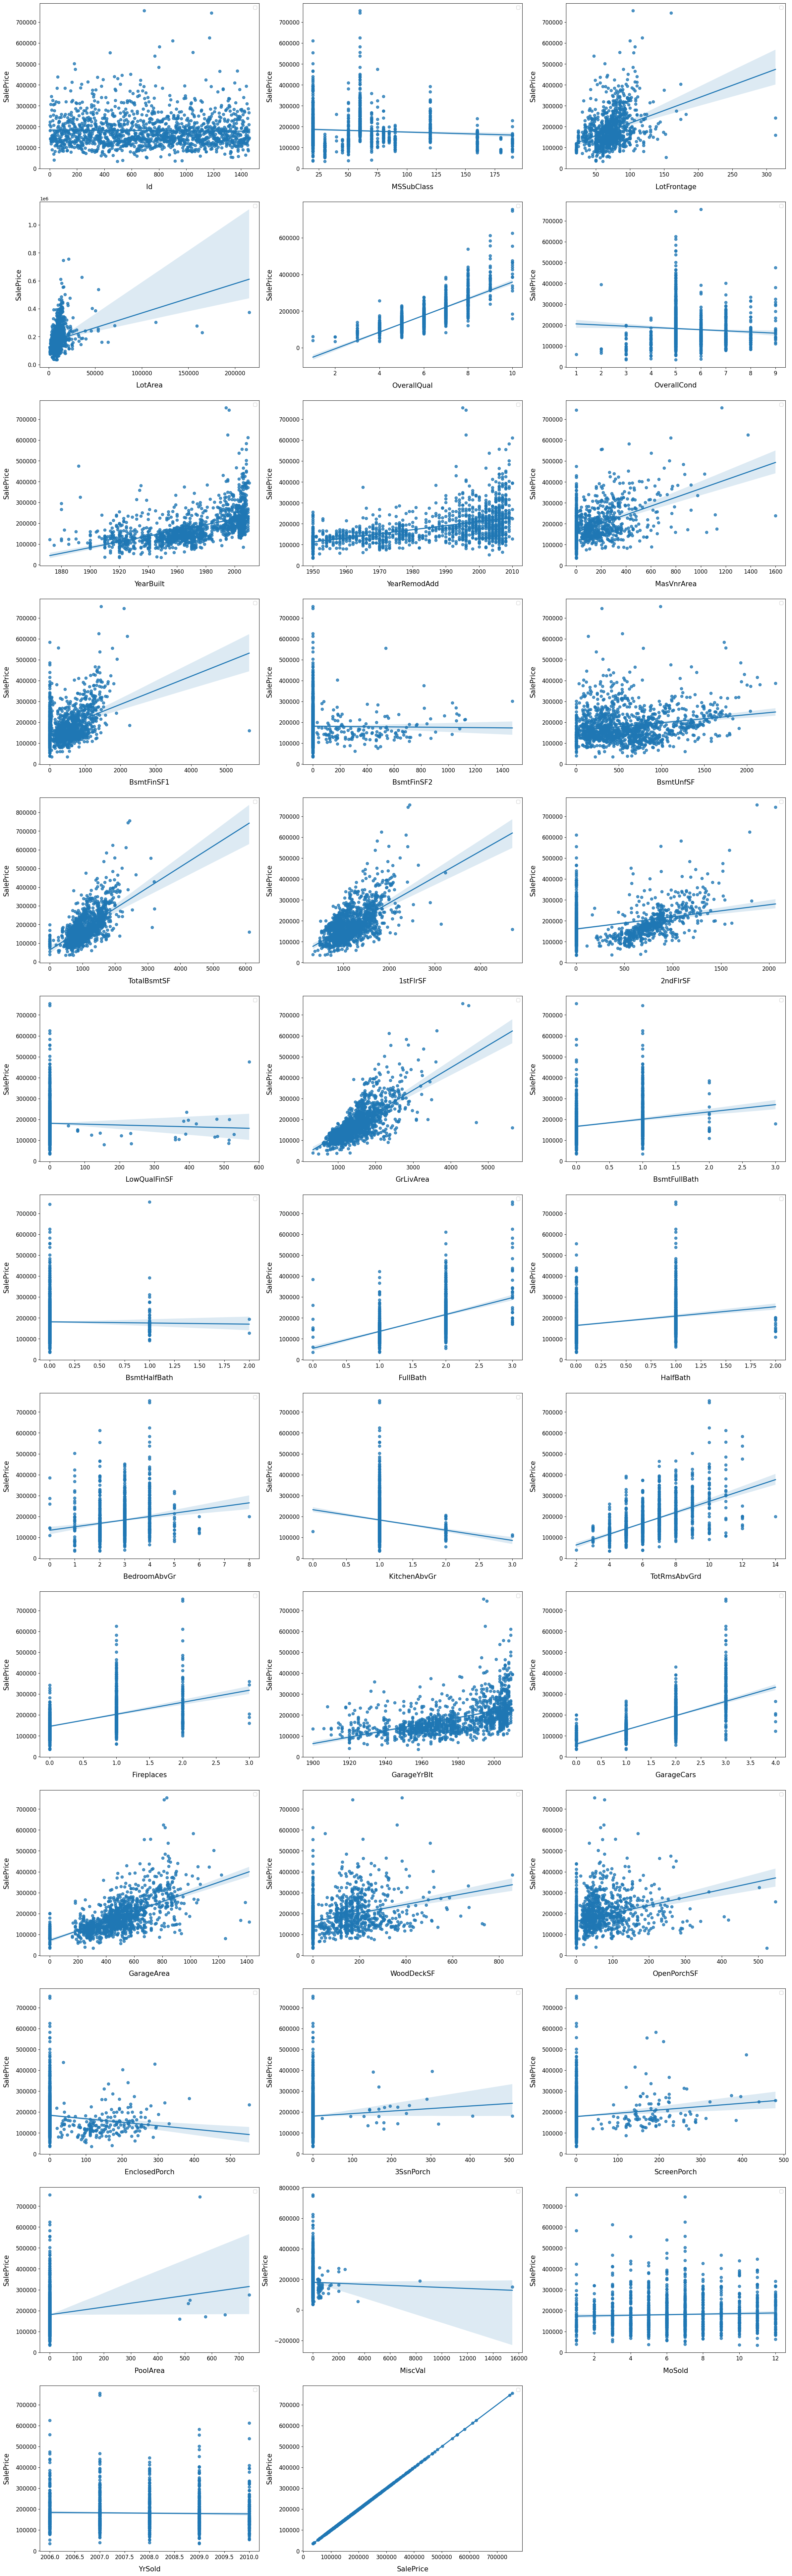

In [53]:
#데이터의 수치형 변수들과 주택 가격의 관계를 나타내는 산점도 및 회귀선
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("Spectral", 8)

for i, feature in enumerate(list(train_num), 1):
    plt.subplot(len(list(train_num)), 3, i)
    sns.regplot(x=feature, y='SalePrice', data=train)

    plt.xlabel(f"{feature}", size=15, labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)

    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

    plt.legend(loc='best', prop={'size' : 10})

plt.show()

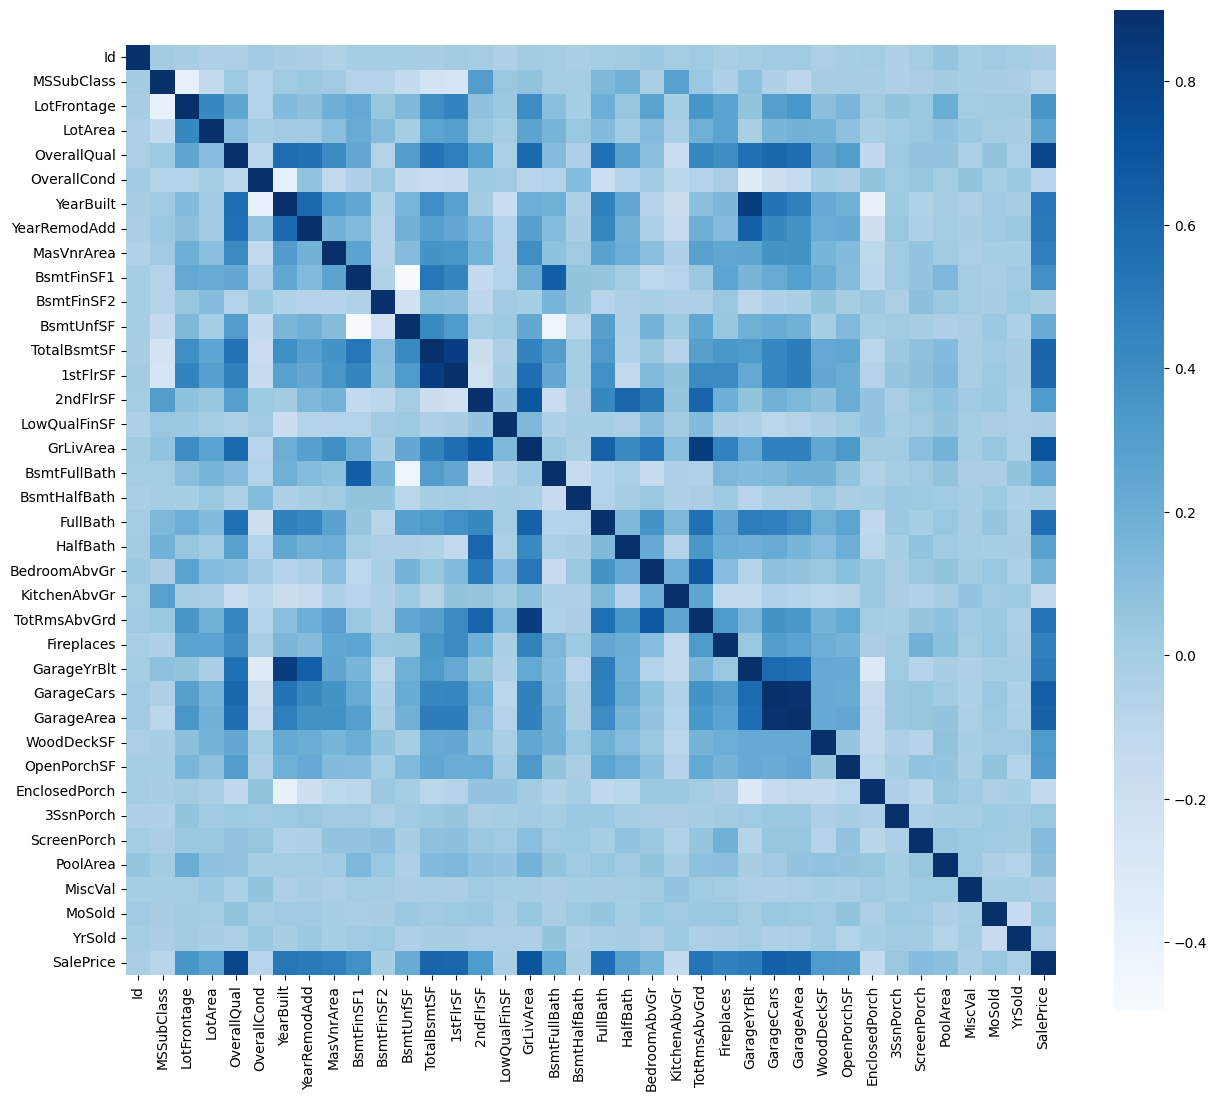

In [54]:
#수치형 변수들과 SalePrice의 상관관계분석표
corr = train_num.corr()
plt.subplots(figsize=(15, 13))
sns.heatmap(corr, vmax=0.9, square=True, cmap="Blues")#, annot=True
#plt.savefig('corr.png')
plt.show()

In [55]:
#수치형 변수들과 SalePrice의 상관계수
train.select_dtypes(exclude = 'object').corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

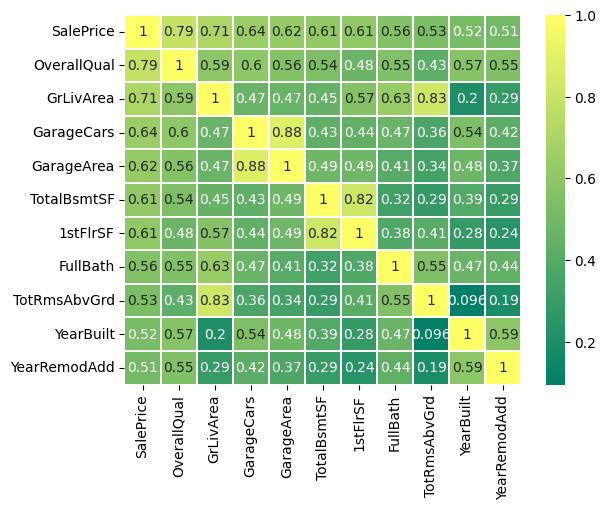

In [56]:
#상관계수가 0.5 이상인 컬럼의 상관분석표
selected_train=train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
sns.heatmap(selected_train.corr(), annot=True, cmap='summer', linewidths=0.2)
plt.show()

In [57]:
correlation_matrix = train_num.corr()

high_correlation = correlation_matrix[correlation_matrix >= 0.8]
high_correlation = high_correlation.stack().reset_index()
high_correlation.columns = ['변수1', '변수2', '상관 계수']

print(high_correlation)

              변수1            변수2     상관 계수
0              Id             Id  1.000000
1      MSSubClass     MSSubClass  1.000000
2     LotFrontage    LotFrontage  1.000000
3         LotArea        LotArea  1.000000
4     OverallQual    OverallQual  1.000000
5     OverallCond    OverallCond  1.000000
6       YearBuilt      YearBuilt  1.000000
7       YearBuilt    GarageYrBlt  0.825667
8    YearRemodAdd   YearRemodAdd  1.000000
9      MasVnrArea     MasVnrArea  1.000000
10     BsmtFinSF1     BsmtFinSF1  1.000000
11     BsmtFinSF2     BsmtFinSF2  1.000000
12      BsmtUnfSF      BsmtUnfSF  1.000000
13    TotalBsmtSF    TotalBsmtSF  1.000000
14    TotalBsmtSF       1stFlrSF  0.819530
15       1stFlrSF    TotalBsmtSF  0.819530
16       1stFlrSF       1stFlrSF  1.000000
17       2ndFlrSF       2ndFlrSF  1.000000
18   LowQualFinSF   LowQualFinSF  1.000000
19      GrLivArea      GrLivArea  1.000000
20      GrLivArea   TotRmsAbvGrd  0.825489
21   BsmtFullBath   BsmtFullBath  1.000000
22   BsmtHa

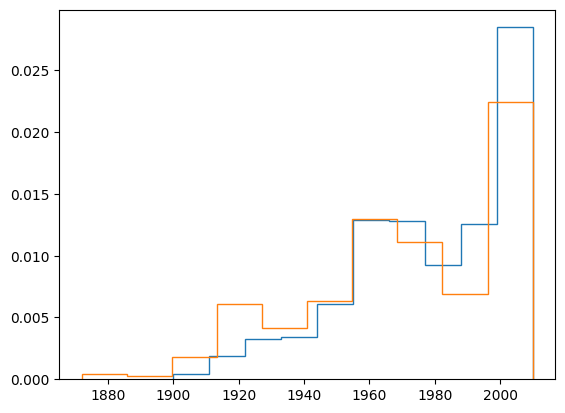

In [58]:
plt.hist(train['GarageYrBlt'], histtype='step', density=True, label='GarageYrBlt')
plt.hist(train['YearBuilt'], histtype='step', density=True, label='YearBuilt')
plt.show()

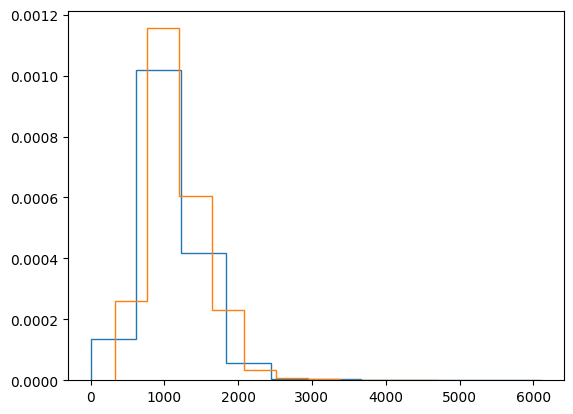

In [59]:
plt.hist(train['TotalBsmtSF'], histtype='step', density=True, label='1stFlrSF')
plt.hist(train['1stFlrSF'], histtype='step', density=True, label='TotalBsmtSF')
plt.show()

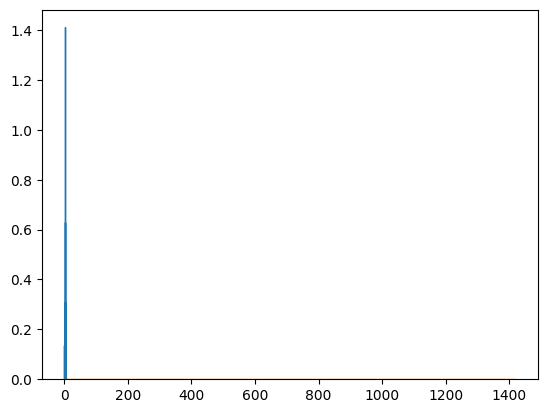

In [60]:
plt.hist(train['GarageCars'], histtype='step', density=True, label='GarageArea')
plt.hist(train['GarageArea'], histtype='step', density=True, label='GarageCars')
plt.show()

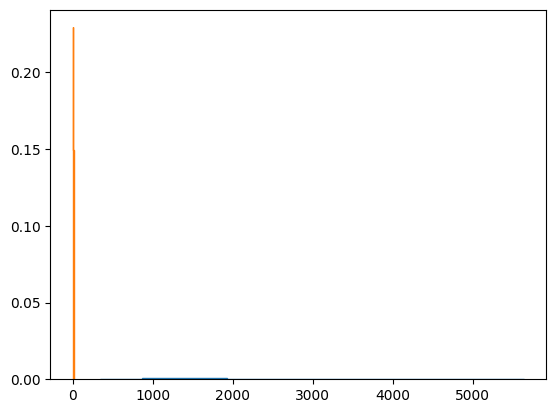

In [61]:
plt.hist(train['GrLivArea'], histtype='step', density=True, label='TotRmsAbvGrd')
plt.hist(train['TotRmsAbvGrd'], histtype='step', density=True, label='GrLivArea')
plt.show()

In [62]:
train = train.drop(columns=['TotalBsmtSF','TotRmsAbvGrd','GarageArea','GarageYrBlt'])
test = test.drop(columns=['TotalBsmtSF','TotRmsAbvGrd','GarageArea','GarageYrBlt'])

In [63]:
object_cols += ['SalePrice']
object_cols_array = np.array(object_cols).reshape(11,4)
object_cols.pop()

'SalePrice'

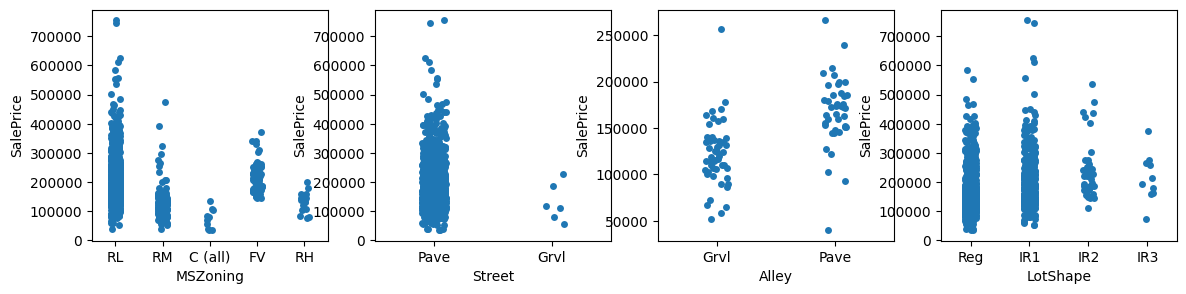

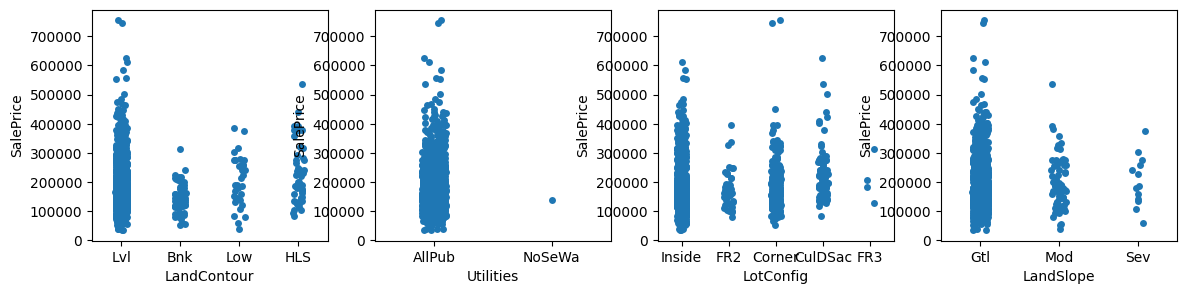

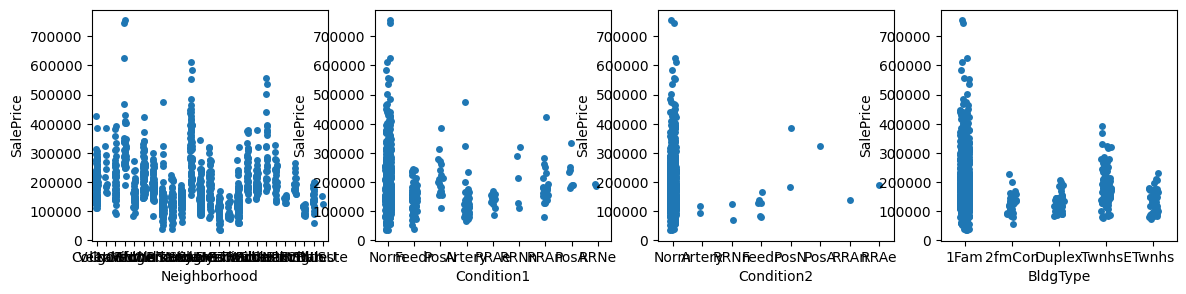

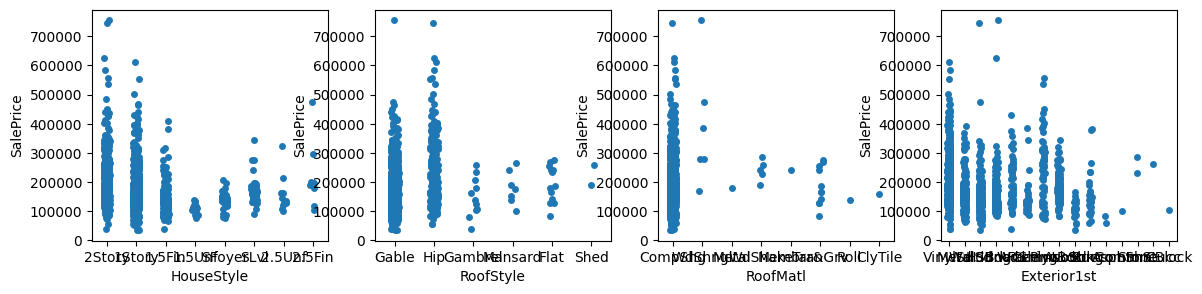

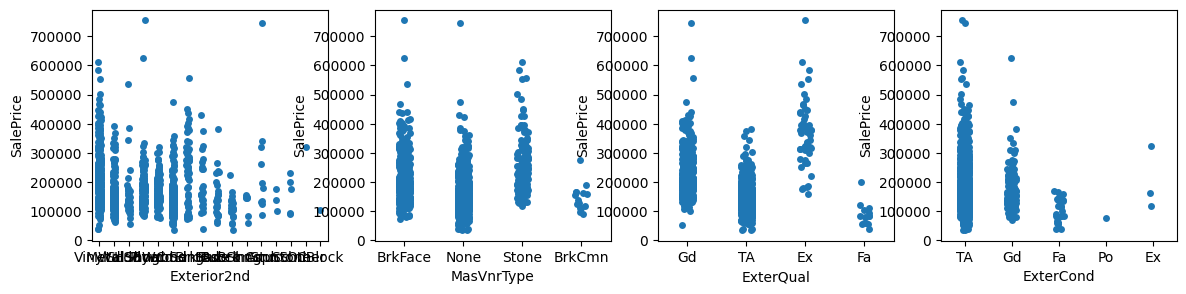

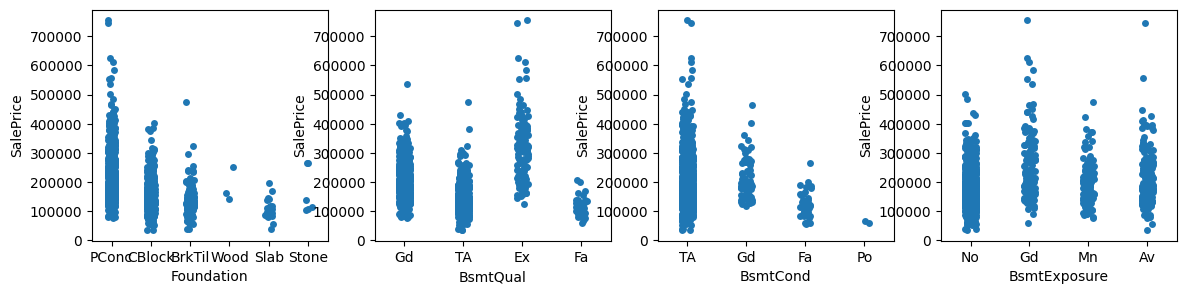

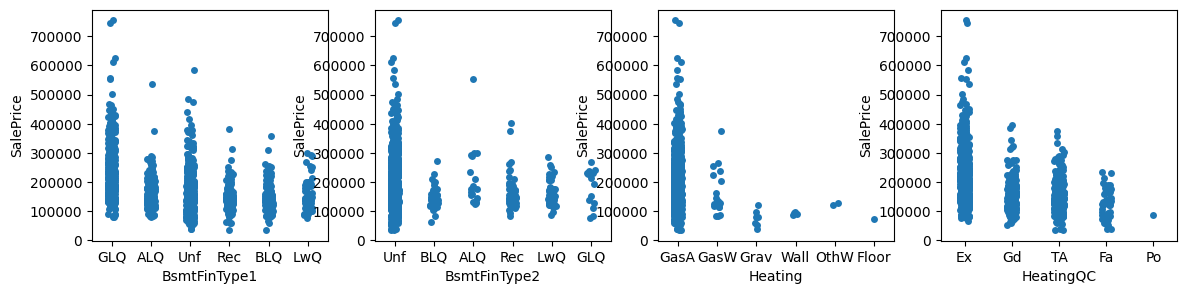

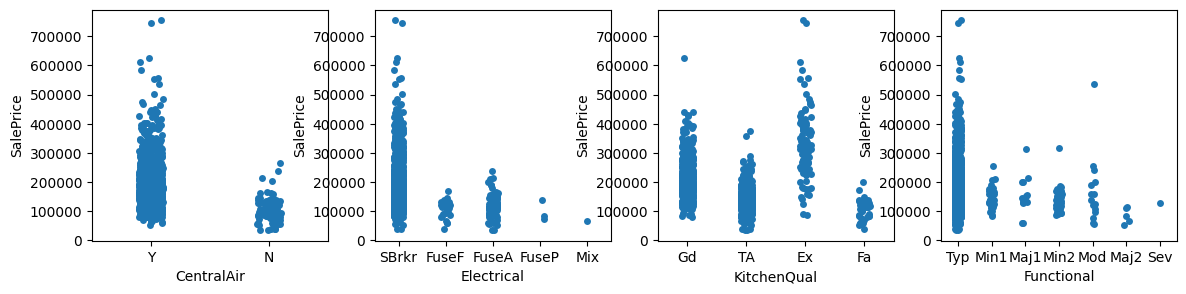

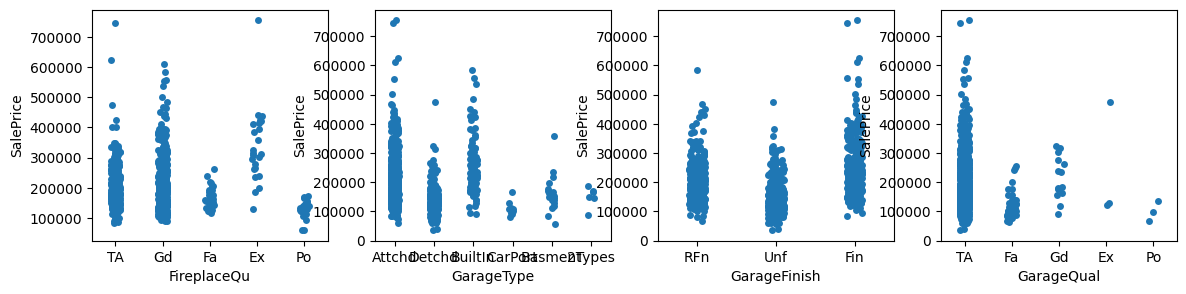

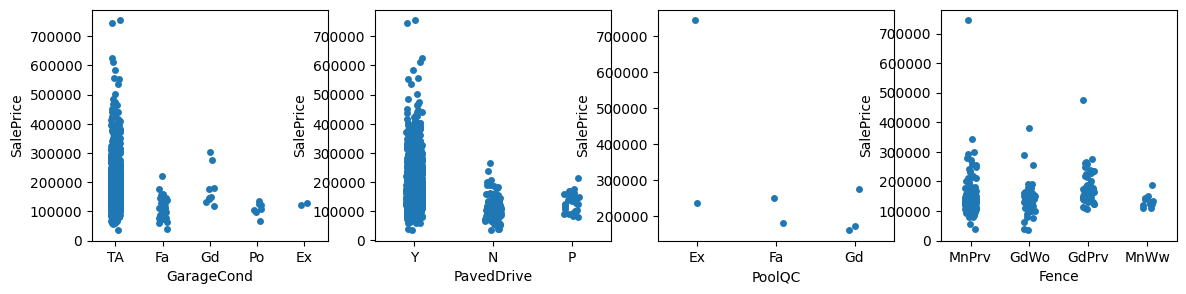

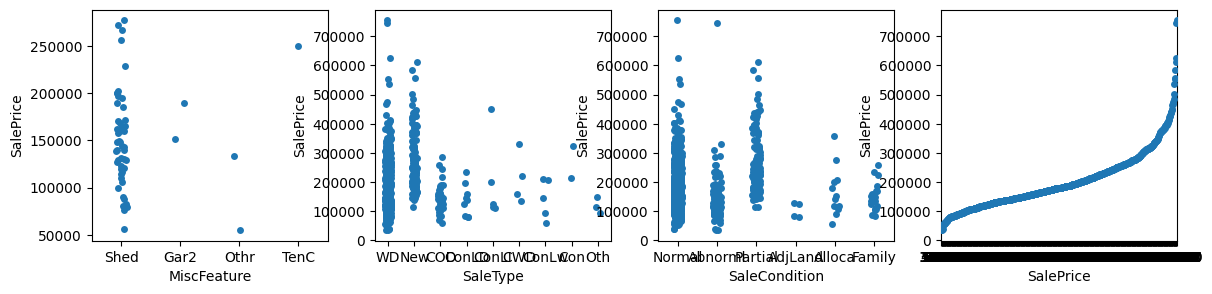

In [64]:
#문자열 변수들과 SalePrice의 관계 분포
import warnings
warnings.filterwarnings('ignore')
for i in range(11):
    fig,ax = plt.subplots(1,4,figsize =(14,3))
    for j in range(4):
        sns.stripplot(train, x = object_cols_array[i,j], y= train.SalePrice, ax = ax[j])

In [65]:
#고유값이 많은 열 삭제
object_nunique = list(map(lambda col: train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

low_cardinality_cols = [col for col in object_cols if train[col].nunique() < 10]
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))
train = train.drop(columns=high_cardinality_cols)

In [66]:
s_test = (test.dtypes == 'object')
object_test  = list(s_test[s_test].index)

object_test_nunique = list(map(lambda col: test[col].nunique(), object_test))
d_test = dict(zip(object_test, object_test_nunique))

low_cardinality_cols = [col for col in object_cols if test[col].nunique() < 10]
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))
test = test.drop(columns=high_cardinality_cols)

In [67]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence'

In [68]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence'

In [69]:
missing_train = pd.DataFrame(train.isna().sum().sort_values(ascending=False) / train.shape[0], columns=["%_missing_values"])

missing_train[missing_train["%_missing_values"] > 0.5]

,%_missing_values
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534


In [70]:
missing_test = pd.DataFrame(test.isna().sum().sort_values(ascending=False) / test.shape[0], columns=["%_missing_values"])

missing_test[missing_test["%_missing_values"] > 0.5]

,%_missing_values
PoolQC,0.997944
MiscFeature,0.965045
Alley,0.926662
Fence,0.801234
FireplaceQu,0.500343


In [71]:
train = train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [72]:
test= test.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [73]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType'

In [74]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType'

In [75]:
#상관계수가 매우 작은 컬럼 삭제( 0.2 이하)
train = train.drop(columns = ['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'BedroomAbvGr', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr'])
test = test.drop(columns = ['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'BedroomAbvGr', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr'])

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [78]:
#수치형 변수 결측치-평균
#문자열 변수 결측치-최빈값
def preprocess_null_values(df):
    numerical_features=df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features=df.select_dtypes(include=['object']).columns

    for i in numerical_features:
        df[i]=df[i].fillna(df[i].mean())

    for i in categorical_features:
        df[i]=df[i].fillna(df[i].mode()[0])

preprocess_null_values(train)
preprocess_null_values(test)

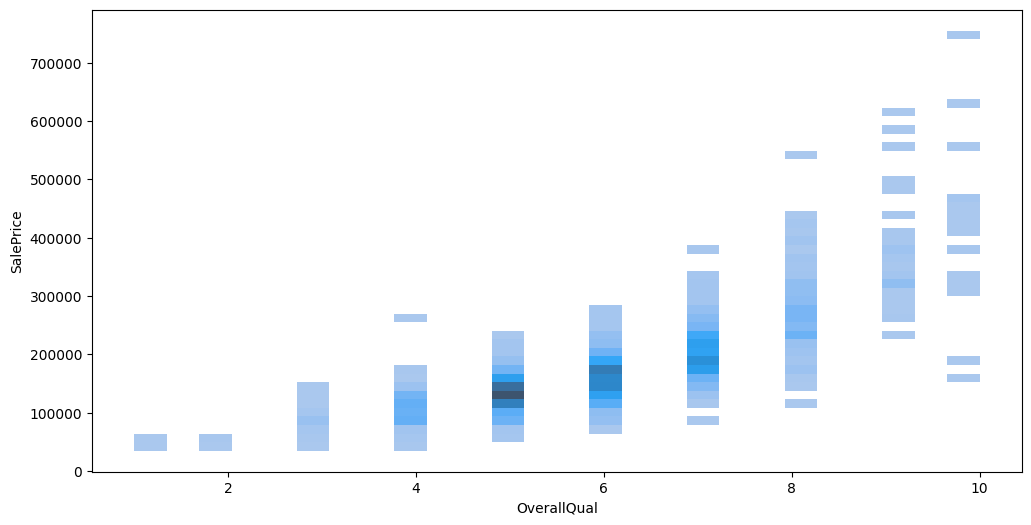

In [79]:
#상관관계 높은 변수 추가 시각화
#전체적인 재질 및 마감 품질
plt.figure(figsize=(12, 6))
sns.histplot(x=train['OverallQual'], y= train['SalePrice'])
plt.show()

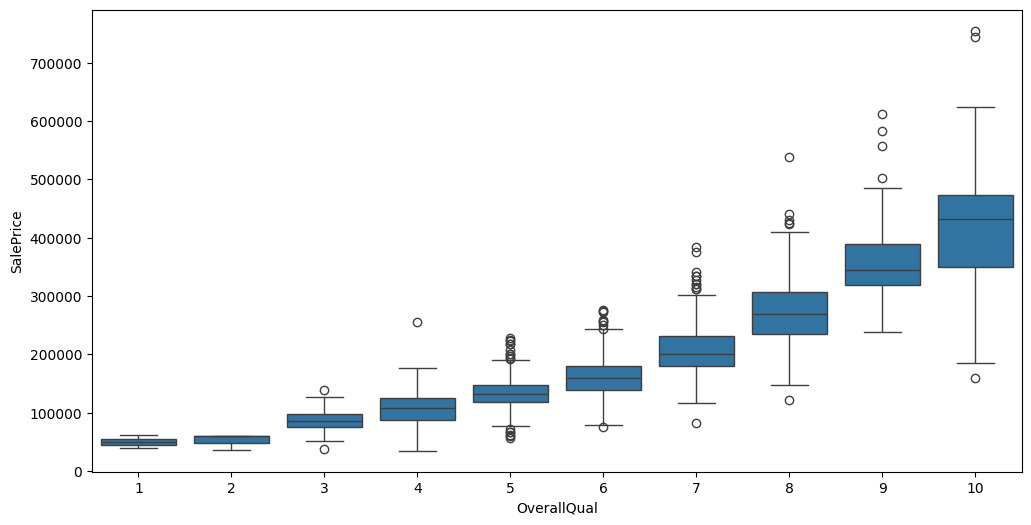

In [80]:
#전체적인 재질 및 마감 품질
f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.show()

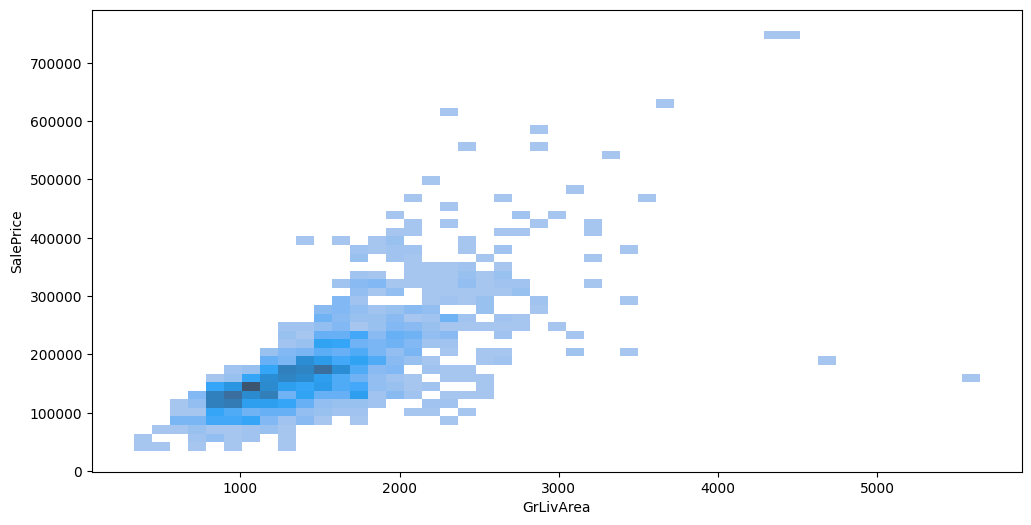

In [81]:
#지상(지상) 생활 면적 평방 피트
plt.figure(figsize=(12, 6))
sns.histplot(x=train['GrLivArea'], y= train['SalePrice'])
plt.show()

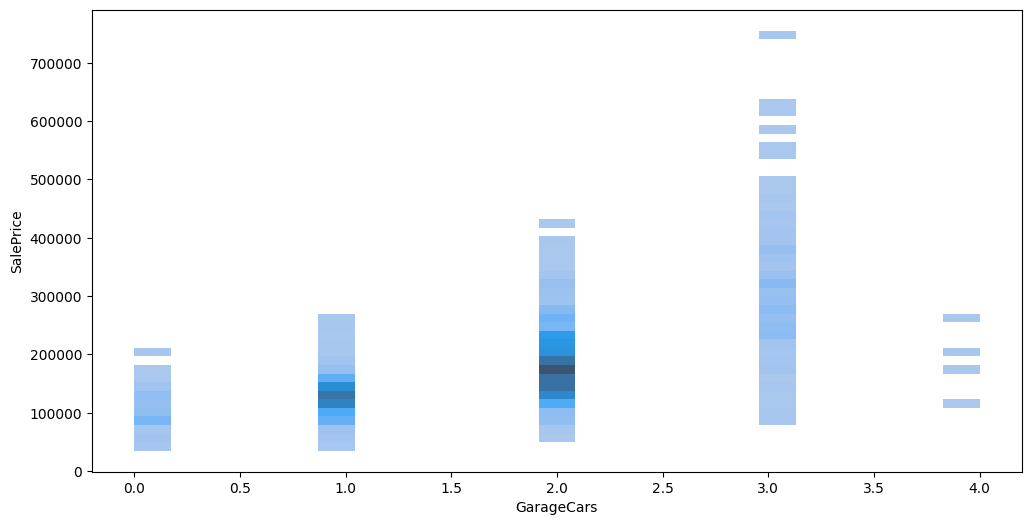

In [82]:
#차량 수용 차고의 크키
plt.figure(figsize=(12, 6))
sns.histplot(x=train['GarageCars'], y= train['SalePrice'])
plt.show()

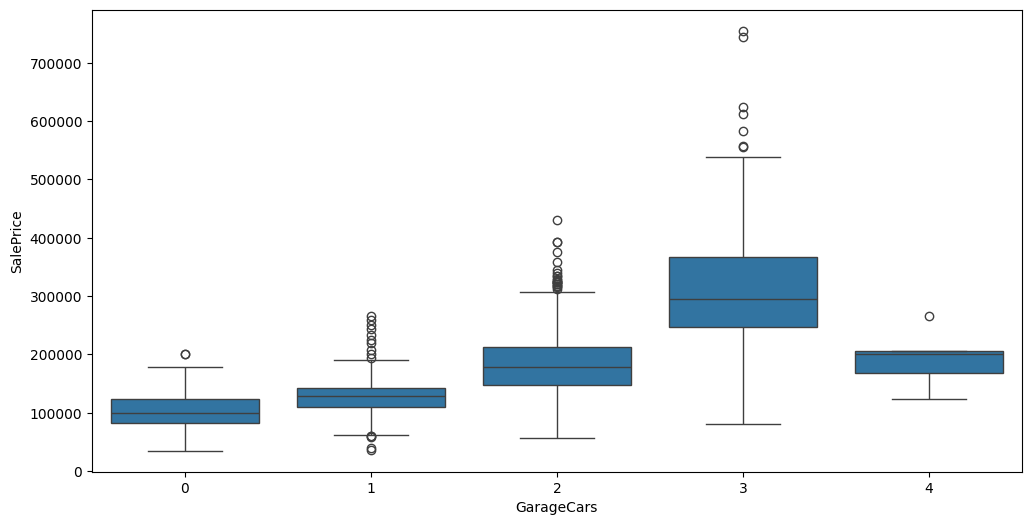

In [83]:
#차량 수용 차고의 크키
f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x='GarageCars', y='SalePrice', data=train)
#fig.axis(ymin=0, ymax=8000000)
plt.show()

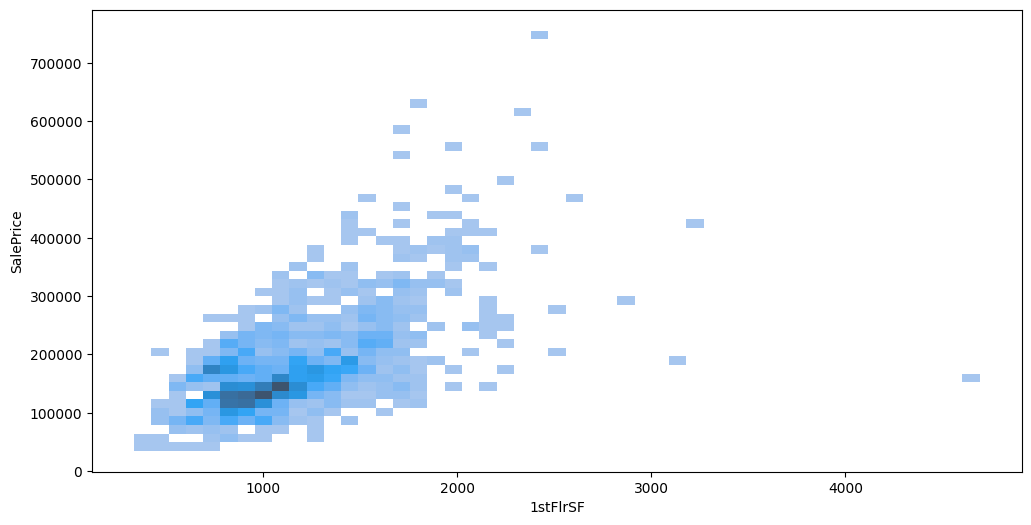

In [84]:
#1층 평방피트
plt.figure(figsize=(12, 6))
sns.histplot(x=train['1stFlrSF'], y= train['SalePrice'])
plt.show()

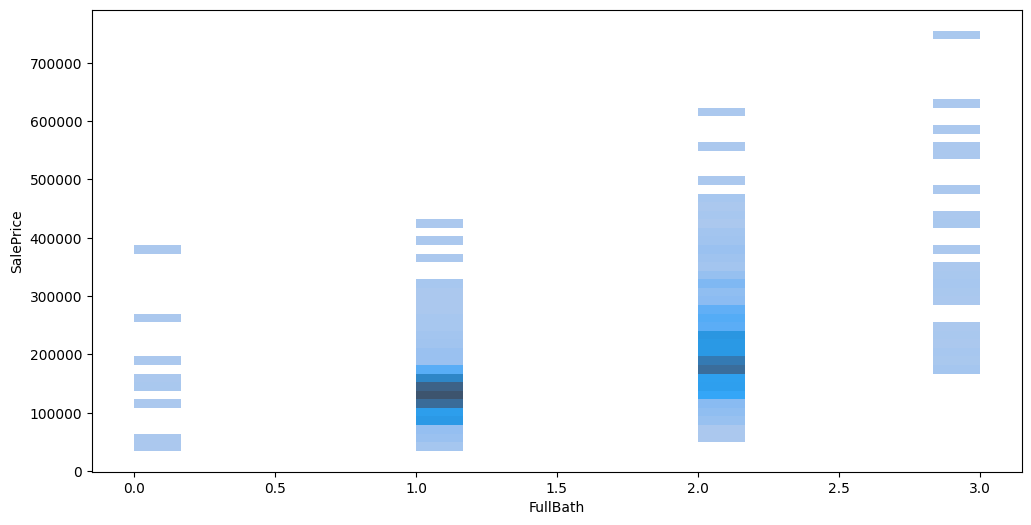

In [85]:
#1층 이상 욕실 완비
plt.figure(figsize=(12, 6))
sns.histplot(x=train['FullBath'], y= train['SalePrice'])
plt.show()

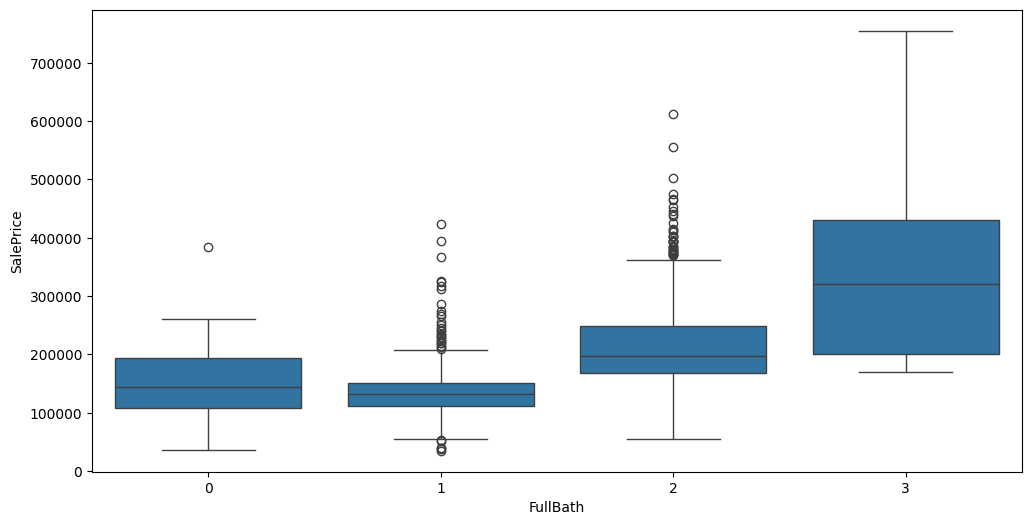

In [86]:
#1층 이상 욕실 완비
f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x='FullBath', y='SalePrice', data=train)
#fig.axis(ymin=0, ymax=8000000)
plt.show()

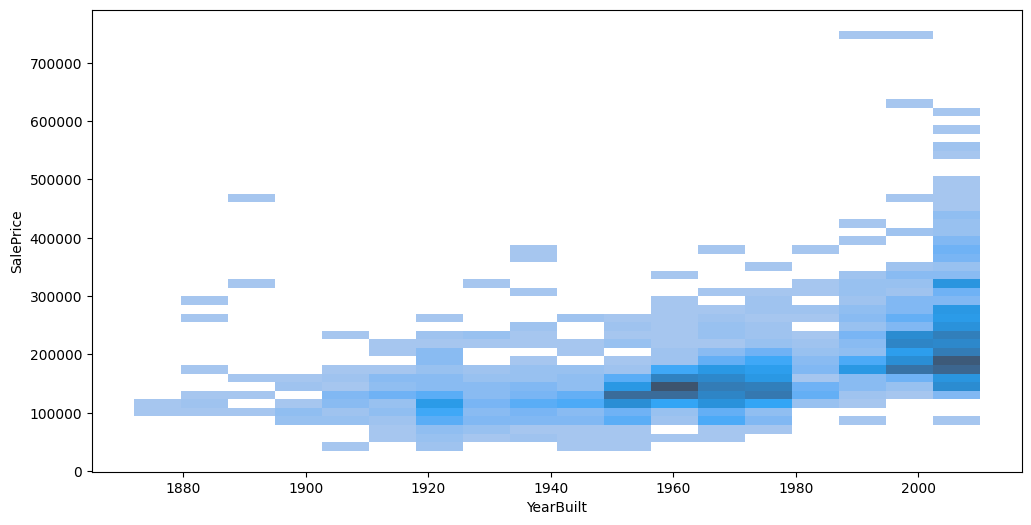

In [87]:
#원래 건설 날짜
plt.figure(figsize=(12, 6))
sns.histplot(x=train['YearBuilt'], y= train['SalePrice'])
plt.show()